# Week 1 - Images as signals

## 1. Image representation


As mentioned, images come in many different flavors ranging from pictures of artwork to LIDAR topography maps. In general, an image can be represented as a $C \times N \times M$ matrix of pixel intensities:

$$
\mathbf{A} = \begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1M} \\
a_{21} & a_{22} & \cdots & a_{2M} \\
\vdots & \vdots & \ddots & \vdots \\
a_{N1} & a_{N2} & \cdots & a_{NM}
\end{pmatrix}
$$

Here, the $P$ dimension is left out (since it is a hassle to write mathematically in Markdown), but imagine $P$ of these matrices "stacked" on top of one another:

Each of these matrices represents a "channel" in the image. Typically, in color images, there are 3 channels with each channel representing Red, Blue, and Green values respectively. Black and white images obviously only have one channel. Images with transparency have an extra "alpha channel" which holds binary values indicating whether or not that particular pixel is transparent. 

Later, particuarly with CNN's, we will see that individual image channels can hold different information about an image.

In [2]:
# ADD SOMETHING SIMPLY ABOUT HOW TO LOAD, RESIZE IMAGES AND WHAT PATHS TO USE WHEN READING THINGS.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL.Image as Image
from math import ceil

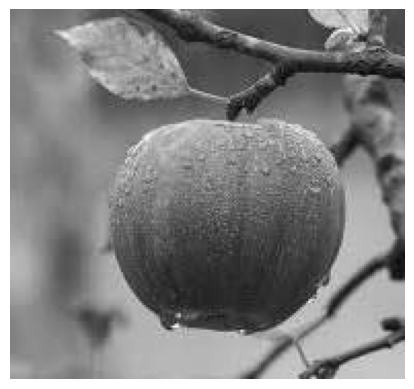

Image shape (height, width): (180, 192)


In [4]:
# Here we use PIL (pillow), but one could just as well use CV2 or another 
apple_image_path = os.path.join('images', 'image_gray.jpg')
image_gray = np.array(Image.open(apple_image_path).convert('L'))
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()
print("Image shape (height, width):", image_gray.shape)

### Exercise 1.1

*As mentioned in the slides, we can also consider binary images where pixels are either "off" or "on". We determine whether a pixel is off or on based on the whether its original pixel value is smaller or larger than a given threshold*

**1. Complete the function below to create a binarized image of the above image**

**2. Complete the second function below to manually grayscale an image**

In [5]:
def rgb_to_grayscale(image):
    return np.mean(image, axis=2)

def binarize_with_thresholding(image, threshold, binary_values=[255, 0]):
    """
    Binarize an image based on a given threshold.
    
    Parameters:
    - image: Image array to be binarized
    - threshold: int, pixel intensity threshold (0-255)
    
    Returns:
    - binarized_image: Numpy array, binarized image
    - binary_values: Maximum and minimum values to binarize to
    """    
    # Apply the threshold
    binarized_image = np.where(image > threshold, 255, 0).astype(np.uint8)
    
    return binarized_image

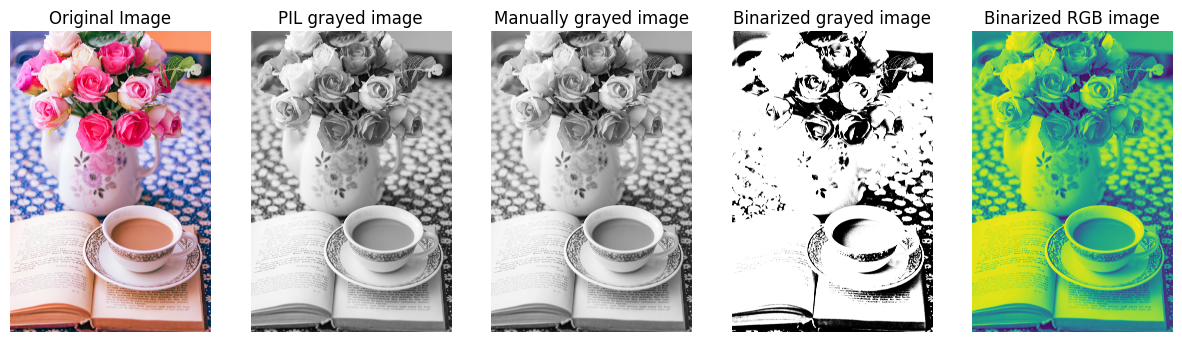

Original image shape (height, width, channels): (6000, 4000, 3)
PIL grayed image shape (height, width): (6000, 4000)
Manually grayed image shape (height, width): (6000, 4000)


In [6]:
original_image_path = os.path.join('images', 'img_1.jpg')
original_image = Image.open(original_image_path)
original_image_PIL_grayed = original_image.convert('L')

# PIL objects are not numpy arrays, convert them to numpy for easier plotting and handling
original_image = np.array(original_image)
original_image_PIL_grayed = np.array(original_image_PIL_grayed)

image_manually_grayed = np.mean(original_image, axis=2)

binarized_image = binarize_with_thresholding(image_manually_grayed, threshold=int(255/2))



# Create a figure and axis for each image
fig, axs = plt.subplots(1, 5, figsize=(15, 5))


axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(original_image_PIL_grayed, cmap='gray') # cmap='gray' is used to display the image in grayscale
axs[1].set_title('PIL grayed image')
axs[1].axis('off')

axs[2].imshow(image_manually_grayed, cmap='gray') # Same as above, cmap gray
axs[2].set_title('Manually grayed image')
axs[2].axis('off')

axs[3].imshow(binarized_image, cmap='gray') # Same as above, cmap gray
axs[3].set_title('Binarized grayed image')
axs[3].axis('off')

axs[4].imshow(image_manually_grayed)
axs[4].set_title('Binarized RGB image')
axs[4].axis('off')


plt.show()

print("Original image shape (height, width, channels):", original_image.shape)
print("PIL grayed image shape (height, width):", original_image_PIL_grayed.shape)
print("Manually grayed image shape (height, width):", image_manually_grayed.shape)


### Exercise 1.2

*As mentioned in the lecture, a $28 \times 28$ binary image has $2^{784}$ different possible images*

**1. How many does a non-binary $28 \times 28$ image using 8-bit values to represent pixel intensities?**

## 2. Color Channels

*Typically placed as either the -1st (last) or the 0th (first) dimension of an image, the channels in an RGB image obviously hold Red-Blue-Green values. For all intents and purposes, these can just be seen as dimensions of a matrix, and subject to regular matrix operations*



### Exercise 2.1

*One should be cognisant of ones images being interpreted in the correct way by whatever package being used. PIL uses RGB by default, while CV2 uses BGR, for example.*

**1. Swap the channels of the above image to make it BGR instead of RGB (should swap blue for red and vice versa)**

In [7]:
image_path = os.path.join('images', 'img_1.jpg')

rgb_image_path = os.path.join('images', 'img_1.jpg')
rgb_image = np.array(Image.open(rgb_image_path))

bgr_image = rgb_image[:, :, ::-1]
bgr_image = rgb_image[:, :, [2, 1, 0]]


print("RGB image shape (height, width, channels):", np.array(rgb_image).shape)

RGB image shape (height, width, channels): (6000, 4000, 3)


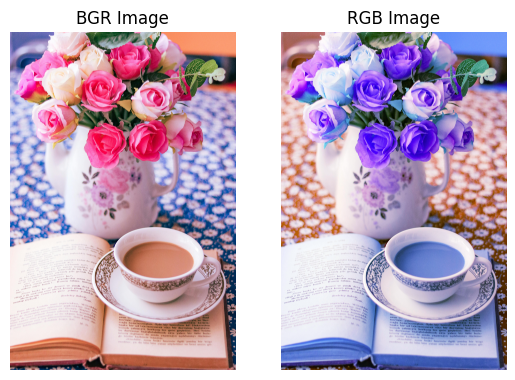

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2)

axs[0].imshow(rgb_image)
axs[0].set_title('BGR Image')
axs[0].axis('off')
axs[1].imshow(bgr_image)
axs[1].set_title('RGB Image')
axs[1].axis('off')
plt.show()

### Exercise 2.2

*Looking at the relative frequency of different colors in an image can be useful way to collect summary statistics on the image in general*

**1. Examine the color histograms of the different images in the week1/images folder, or ones you find yourself, do they make sense? What do they tell you about the image itself?**

ANSWER: Should say something about how much of different colors are contained in the images, useful if you're looking for particuarly strong colors of one type or antoher.

**2. Try modifying some of the colors by fixed amounts, either by multiplying with, or adding scalar values, how do the histograms change... What should you be congnisant of in these cases?**

ANSWER: If you simply add or multiply by fixed values, some values in the image will be above the max of the color distribution. If you don't change the colormap of imshow with new values, you will also screw up the showing of hte image.

**3. Normalize each histogram by total number of values of that color to get a "CDF" of pixel values**

**4. What is the difference in information from not normalizing to normalizing your pixel intensities?**



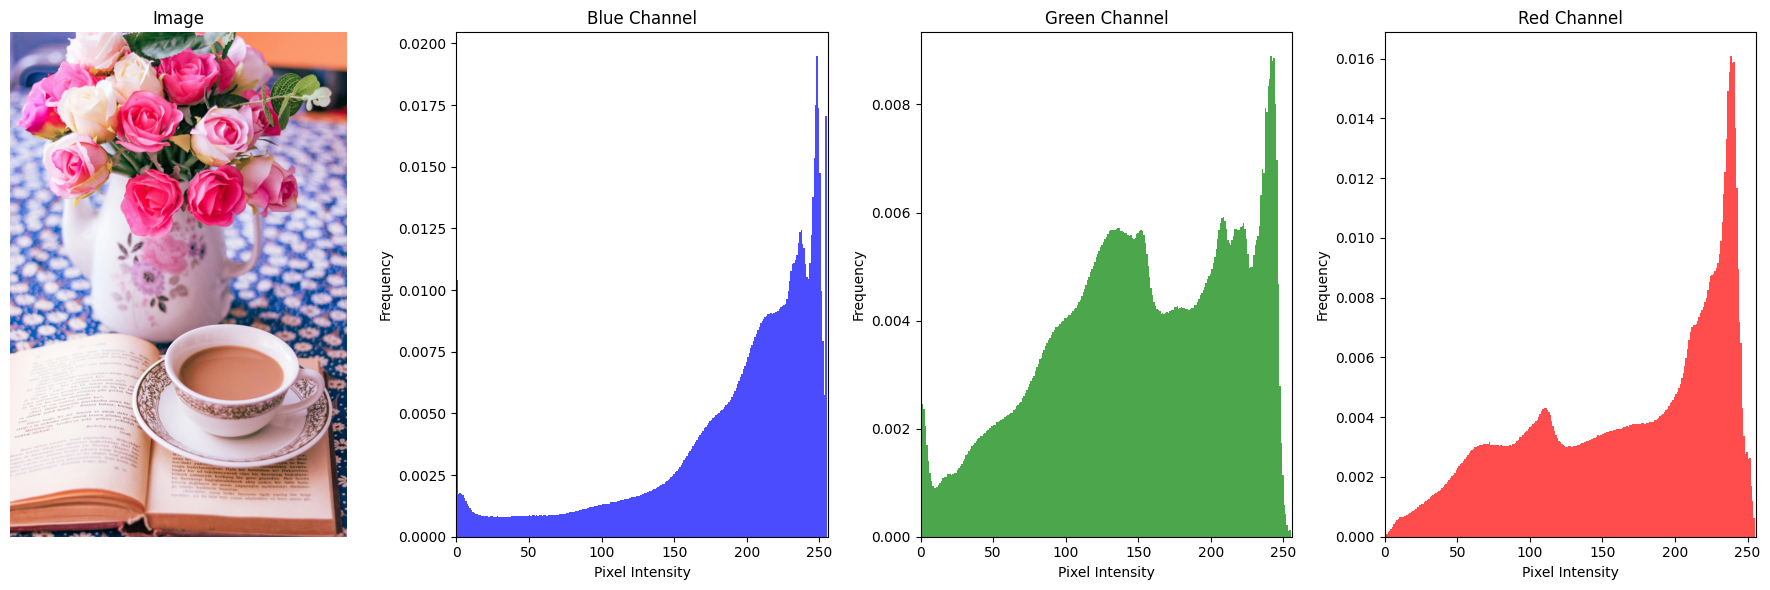

In [9]:
def show_color_distribution(image, density=False):
    """
    Display the distribution of pixels in each color channel (RGB) of an image.
    
    Parameters:
    - image: NumPy array representing the image.
    """
    # Split the image into its color channels
    
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

    # Show the original image
    axs[0].set_title('Image')
    axs[0].imshow(image)
    axs[0].axis('off')
    
    # Plot the histogram of each of the color channels
    colors = ('b', 'g', 'r')
    channel_names = ('Blue', 'Green', 'Red')
    for i, (color, channel_name) in enumerate(zip(colors, channel_names)):
        axs[i + 1].hist(image[..., i].flatten(), bins=256, color=color, alpha=0.7, density=density)
        axs[i + 1].set_title(f'{channel_name} Channel')
        axs[i + 1].set_xlabel('Pixel Intensity')
        axs[i + 1].set_ylabel('Frequency')
        axs[i + 1].set_xlim([0, 256])
    
    plt.tight_layout()
    plt.show()

show_color_distribution(rgb_image)

## 3. Distance Metrics and simliarity measures

*Distance metrics (often "Incorrectly" called 'norms') can be considered as a ways of measuring simliarity between two datums. You should already have learned about (and used) the concept in 02450, but given their importance, they are recapped here (somewhat informally).*


*A distance metric is a pair of a **set $\mathcal{M}$** and a **function $d$** such that: $d: \mathcal{M} \times \mathcal{M} \rightarrow \mathbb{R}$*

*I.E a function that takes two elements from a set and spits out a real number that compares them*

*Apart from this, it must also satisfy the following conditions (also mentioned in slide w1 slide 39)*

- *Non-negativity*: $d(x,y) \geq 0 \quad \forall x \forall y$
  - *A distance can never be negative*
- *Indiscernibility of identities*: $d(x, y) = 0 \iff x  = y$
  -  *A distance is zero only if we compare an element with a copy of itself*
-  *Symmetry*: $d(x,y) = d(y,x) \quad \forall x \forall y$
   -  *A distance from a to b is the same as from b to a*
-  *Triangle inequality:* $d(x,z) \leq d(x, y) + d(y,z) \quad \forall x \forall y \forall z$
   -  *The distance from a to c is always the same as or shorter than from a to b to c*


*In this course, we work with the following norms:*

- *Minkowski (p-norm)*:
  - $d_p(x,y) = \left(\sum^n_{i=1} |x_i - y_i|^p \right)^{\frac{1}{p}} \quad \forall$

*And thats it... Manhattan (absolute) and Euclidian are also included in this. Do note, that the Minkowski is only a true distance metric (and norm) for $p > 1$*


*As for similarity measures (for which the above requirements do not apply), we also use:*

- *Cosine similarity (a sort of angle between vectors)*
  - $d_{cos}(x,y) = \frac{\mathbf{x} \cdot \mathbf{y} } {||\mathbf{x}|| \space ||\mathbf{y}||}$
  - $ = \frac{\sum^n_{i=1} x_i y_i}{\sqrt{\sum^n_{i=1}x_i^2} \sqrt{\sum^n_{i=1} y^2_i}}$ 
    - $1$: Vectors point to same direction 
    - $0$: Vectors are orthogonal (90 degree angle to one another)
    - $-1$: Vectors point in opposite directions
- *Squared (euclidian) distance (not a distance metric)*
  - $d_{SE}(x,y) = \left(\sum^n_{i=1} (x_i - y_i)^2 \right)$
  - Often used for loss calculation (you may have seen that already)




- Write code for euclidian, manhattan and cosine distance measures
- Show that the cosine similarity and the p-norm are norms (have certain properties of norms)
- Perhaps something with using the different norms on the images that have been slightly perturbed 

### Exercise 3.1

*As mentioned, the squared distance somewhat unintuitively is not a true distance metric, same goes for the cosine distance*


**1. First, argue why the squared distance is *not* a distance metric (Hint: It does not satisfy the triangle inequality)**

ANSWER: $x = 0, y = \frac{1}{2}, z = 1 \rightarrow |x - z|^2 = 1, |x - y|^2 + |y - z|^2 = \frac{1}{4} + \frac{1}{4} = \frac{1}{2}$

**2. Next, argue for why the cosine distance is not a true distance metric**

ANSWER: It is quite trivially given by the fact that it is not non-negative:

$$x = [1, 1], y = [-1,-1] \rightarrow \frac{-1 \cdot 1 + -1 \cdot 1}{\sqrt{2}\sqrt{2}} = \frac{-2}{2} = -1$$

<!-- **2. Now, argue mathematically for why the Euclidian distance is indeed a distance metric (I.E fulfills the above requirements for a distance metric)** -->

**3. As mentioned above, the Minkowski distance is only a true distance measure for $p > 1$, why is this?**

ANSWER: It breaks the triangle inequality:

$$x = [0,0], y = [0,1], z = [1,1], p = \frac{1}{2} \rightarrow d(x, z) = 2^{\frac{1}{\frac{1}{2}}} = 4, d(x,y) + d(y,z) = 1 + 1 = 2$$



### Exercise 3.2

**1. Implement the Euclidian, manhattan, cosine, and minkowski distances below respectively, you may be tempted to use built-in numpy functions, do not**

**2. Verify your implementations with the plot_distance_heatmap function two cells below**

In [10]:
def euclidean_distance(vec1, vec2, *args):
    # return np.linalg.norm(vec1 - vec2)
    return sum((vec1 - vec2) ** 2) ** 0.5

def manhattan_distance(vec1, vec2, *args):
    # return np.sum(np.abs(vec1 - vec2))
    return sum(abs(vec1 - vec2))

def cosine_distance(vec1, vec2, *args):
    "Please remember this is the cosine *distance*"
    dot_product = vec1 @ vec2
    norm_vec1 = np.sqrt(vec1 @ vec1)
    norm_vec2 = np.sqrt(vec2 @ vec2)

    return 1 - (dot_product / (norm_vec1 * norm_vec2))

    # dot_product = np.dot(vec1, vec2)
    # norm_vec1 = np.linalg.norm(vec1)
    # norm_vec2 = np.linalg.norm(vec2)
    # return 1 - (dot_product / (norm_vec1 * norm_vec2))

def minkowski_distance(vec1, vec2, p):
    return (np.sum(np.abs(vec1 - vec2) ** p)) ** (1/p)
    # return np.power(np.sum(np.power(np.abs(vec1 - vec2), p)), 1/p)



In [11]:
def plot_distance_heatmap(distance_metrics, x_range=(-20, 20), y_range=(-20, 20), resolution=200, names='', **kwargs):
    """
    Plots a heatmap of the given distance metric for 2D vectors over a specified range.

    Parameters:
    - distance_metric: A function that takes two 2D vectors and returns a scalar distance.
    - x_range: A tuple specifying the range of x values (min, max).
    - y_range: A tuple specifying the range of y values (min, max).
    - resolution: The number of points along each axis.
    """
    # Generate a grid of points
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    ps = kwargs.get('ps', [None for el in distance_metrics])
    
    fig, axs = plt.subplots(nrows=ceil(len(distance_metrics) / 2), ncols=2, figsize=(8, 6))
    
    for idx, (name, metric, ax) in enumerate(zip(names, distance_metrics, axs.flatten())):
        # Compute the distance metric for each point in the grid
        Z = np.zeros_like(X)
        for i in range(resolution):
            for j in range(resolution):
                vector = np.array([X[i, j], Y[i, j]])
                Z[i, j] = metric(vector, np.array([1e-5, 1e-5]), ps[idx])
        # Plot the heatmap
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.grid("both")
        ax.set_title(f'{name}')
        cont = ax.contourf(X, Y, Z, cmap='viridis')
        fig.colorbar(cont, label='Distance', ax=ax)
    plt.tight_layout()
    plt.show()

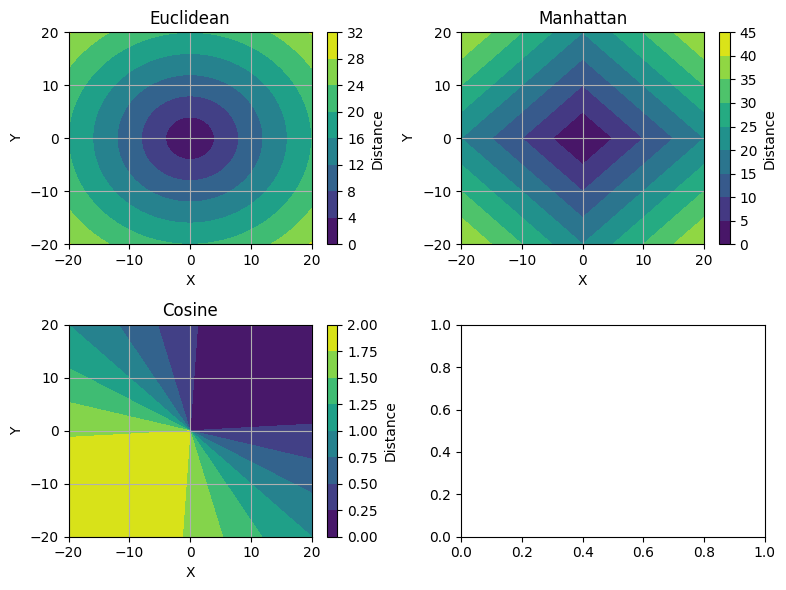

In [12]:
plot_distance_heatmap((euclidean_distance, manhattan_distance, cosine_distance), names=("Euclidean", "Manhattan", "Cosine",))

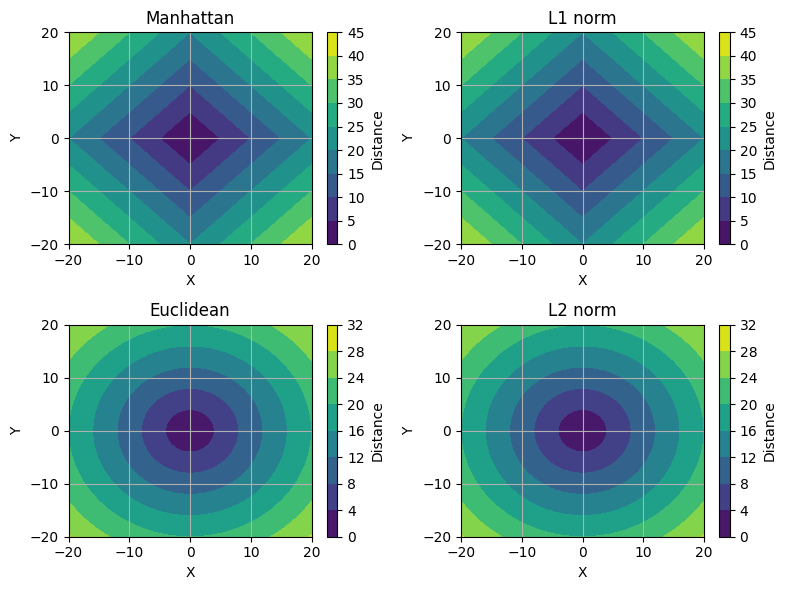

In [13]:
plot_distance_heatmap((manhattan_distance, minkowski_distance, euclidean_distance, minkowski_distance), names=("Manhattan", "L1 norm", "Euclidean", 'L2 norm'), ps=[1, 1, 2, 2])

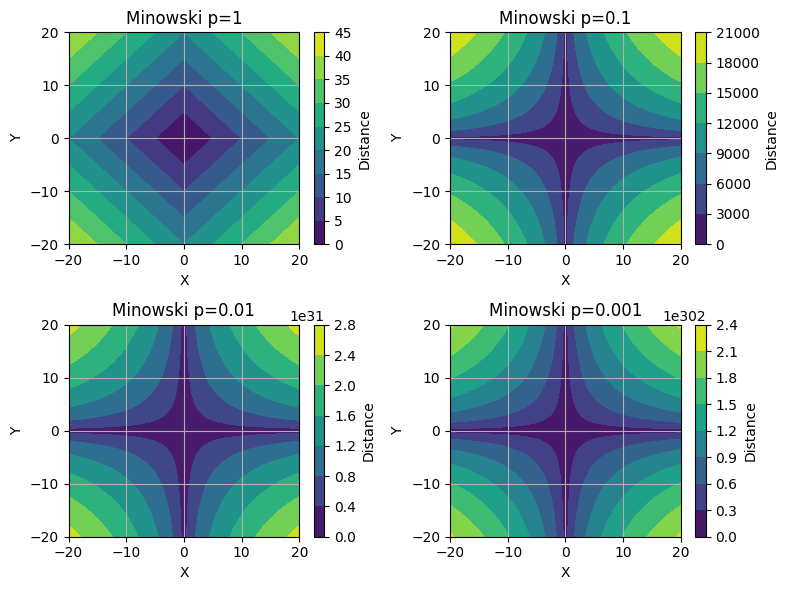

In [14]:
ps = [1, 1e-1, 1e-2, 1e-3]
plot_distance_heatmap([minkowski_distance for _ in ps], names=[f'Minowski p={val}' for val in ps], ps=ps)


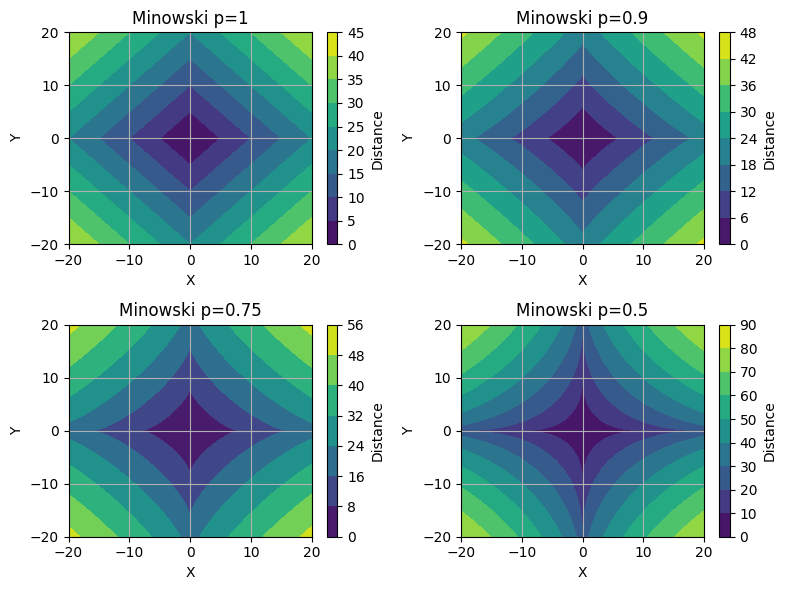

In [15]:
ps = [1, 0.9, 0.75, 0.5]
plot_distance_heatmap([minkowski_distance for _ in ps], names=[f'Minowski p={val}' for val in ps], ps=ps)

### Exercise 3.3

**1. Find uses cases where it is most beneficial to use the Manhattan, Euclidian, and Cosine distance measure respectively**

ANSWER:

- *Manhattan*: Say we have two vectors corresponding to directions you need to take to get a certain place in a city. It would not make sense to compare the euclidian distances of these vectors, since we obviously cannot phase through buildings and solid walls. Comparing the manhattan norms of these vectors therefore, would be necessary.
- *Euclidian*: If we want the shortest distance in any euclidian space, lol
- *Cosine*: If we are only interested in the angle of, and not the magnitude of vectors. One example would be comparing the "genres" of different texts based on the words they contain. Say each word contributes to a certain genre in some way. Finding out how different texts relate to one another would almost completely depend on the relative angle between them, as similar texts with wildly different number of words do exist. 

**2. What happens with the minkowski distance as $p \rightarrow \infty$? If we use this to compare two distances with one another, what does it measure?**

ANSWER: As p goes towards infinity, infinitely smaller differences in vector values will lead to infinitely greater differences in distance. As such, using the Minkowski norm with $p \rightarrow \infty$ essentially equates to:

$$\max\left[d_{p\rightarrow\infty}(\mathbf{r}), d_{p\rightarrow\infty}(\mathbf{s}) \right] \approx \argmax(\mathbf{r}, \mathbf{s})$$

**3. What happens withe the minkowski distance as $p \rightarrow 0$? If we use this to compare two distances with one another, what does it measure?**

ANSWER: We know that for any real number $r | r \neq 0$, it holds that $r^0 = 1$, therefore, comparing two minkowski distances with $p \rightarrow 0$ corresponds to comparing the amount of nonzero indices.